In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls 'drive/My Drive'
path = '/content/drive/MyDrive/EEG_data.csv'
dataset = pd.read_csv(path)

path = "/content/drive/MyDrive/demographic_info.csv"
data_demo = pd.read_csv(path)

#df=pd.read_csv('../input/confused-eeg/EEG_data.csv')
#data = pd.read_csv('../input/confused-eeg/demographic_info.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 apply
'Breast Cancer Segmentation.gslides'
'Colab Notebooks'
'Copy of Copy of attendance-pod-900-example-walrus.gsheet'
'Copy of Foreward EEG prediction - Line chart 1.gsheet'
 DeepRegression_LSTM_OriginalRamy.py
 demographic_info.csv
 Ding2017_Article_High-resolutionManometryInPati.pdf
 EEG_data.csv
 EEG_Hackathon
 Esophageal+Manometry.pdf
 ev-03-2018-10-AG3394-0250.pdf
 ff8f4ae1531db7e5741d95f083de3184b9f0.pdf
'FMRI Images motion noise reduction.gslides'
'global_talent_endorsed_funder_request_form (3).docx'
 GVSinPD_UPDRS.csv
 GVSinPD_UPDRS.xlsx
'GVSinPD_UPDRS.xlsx - Sheet1.csv'
 matlab.mat
 mnist_test.csv
 mnist_train.csv
 NewData.mat
 new_VGG16.py
'oyt-zsuz-jnh - Mar 18, 2021.gjam'
 paper
 PIIS0016510718307351.pdf
 polydata.csv
 Project.gsheet
 READY4DL_500.mat
'Report UBC.docx'
 Resume
 SFU
 Sheet1.gsheet
 SoojinData
'Untitled presentation.gslides'
 vid

In [ ]:
data_demo = data_demo.rename(columns = {'subject ID': 'SubjectID',' gender':'gender',' age':'age',' ethnicity':'ethnicity'})
dataset = dataset.merge(data_demo,how = 'inner',on = 'SubjectID')
dataset.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,age,ethnicity,gender
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0,25,Han Chinese,M
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0,25,Han Chinese,M
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0,25,Han Chinese,M
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0,25,Han Chinese,M
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0,25,Han Chinese,M


In [ ]:
dataset.shape

(12811, 18)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12811 entries, 0 to 12810
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SubjectID           12811 non-null  float64
 1   VideoID             12811 non-null  float64
 2   Attention           12811 non-null  float64
 3   Mediation           12811 non-null  float64
 4   Raw                 12811 non-null  float64
 5   Delta               12811 non-null  float64
 6   Theta               12811 non-null  float64
 7   Alpha1              12811 non-null  float64
 8   Alpha2              12811 non-null  float64
 9   Beta1               12811 non-null  float64
 10  Beta2               12811 non-null  float64
 11  Gamma1              12811 non-null  float64
 12  Gamma2              12811 non-null  float64
 13  predefinedlabel     12811 non-null  float64
 14  user-definedlabeln  12811 non-null  float64
 15  age                 12811 non-null  int64  
 16  ethn

In [ ]:
dataset.columns

Index(['SubjectID', 'VideoID', 'Attention', 'Mediation', 'Raw', 'Delta',
       'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2',
       'predefinedlabel', 'user-definedlabeln', 'age', 'ethnicity', 'gender'],
      dtype='object')

In [ ]:
dataset['gender']=dataset['gender'].replace({'M':1,'F':0})
dataset['ethnicity']=dataset['ethnicity'].replace({'Han Chinese':0,'Bengali':1,'English':2})

In [ ]:
dataset.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,age,ethnicity,gender
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0,25,0,1
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0,25,0,1
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0,25,0,1
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0,25,0,1
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0,25,0,1


In [ ]:
dataset['VideoID'].value_counts()

1.0    1414
0.0    1412
4.0    1356
9.0    1281
8.0    1280
2.0    1274
5.0    1230
3.0    1206
6.0    1181
7.0    1177
Name: VideoID, dtype: int64

In [ ]:
dataset['predefinedlabel'].value_counts()

0.0    6662
1.0    6149
Name: predefinedlabel, dtype: int64

In [ ]:
for col in dataset.columns:
    if(dataset[col].isnull().sum()>0):
        print(col)

In [ ]:
dataset.describe()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,age,ethnicity,gender
count,12811.000000,12811.000000,12811.000000,12811.000000,12811.000000,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,12811.000000,12811.000000,12811.000000,12811.000000,12811.000000
mean,4.487394,4.390602,41.313871,47.182656,65.570760,6.057853e+05,1.680526e+05,4.138435e+04,3.318339e+04,2.431837e+04,3.814433e+04,2.959255e+04,1.441597e+04,0.479978,0.512606,25.409960,0.301538,0.799001
std,2.865373,2.913232,23.152953,22.655976,597.921035,6.376236e+05,2.441346e+05,7.243082e+04,5.831410e+04,3.837968e+04,7.906606e+04,7.982637e+04,3.603523e+04,0.499618,0.499861,2.205148,0.641169,0.400763
min,0.000000,0.000000,0.000000,0.000000,-2048.000000,4.480000e+02,1.700000e+01,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,0.000000,0.000000,24.000000,0.000000,0.000000
25%,2.000000,2.000000,27.000000,37.000000,-14.000000,9.806400e+04,2.691750e+04,6.838000e+03,6.852000e+03,6.140000e+03,7.358500e+03,4.058000e+03,2.167500e+03,0.000000,0.000000,24.000000,0.000000,1.000000
50%,4.000000,4.000000,43.000000,51.000000,35.000000,3.954870e+05,8.133100e+04,1.750000e+04,1.495900e+04,1.281800e+04,1.581000e+04,9.763000e+03,5.116000e+03,0.000000,1.000000,25.000000,0.000000,1.000000
75%,7.000000,7.000000,57.000000,63.000000,90.000000,9.166230e+05,2.052760e+05,4.477950e+04,3.455050e+04,2.740600e+04,3.549400e+04,2.488800e+04,1.266950e+04,1.000000,1.000000,25.000000,0.000000,1.000000
max,9.000000,9.000000,100.000000,100.000000,2047.000000,3.964663e+06,3.007802e+06,1.369955e+06,1.016913e+06,1.067778e+06,1.645369e+06,1.972506e+06,1.348117e+06,1.000000,1.000000,31.000000,2.000000,1.000000


In [ ]:
data=[]
data=dataset[dataset['Attention'] > 0.0]
data.shape

(11388, 18)

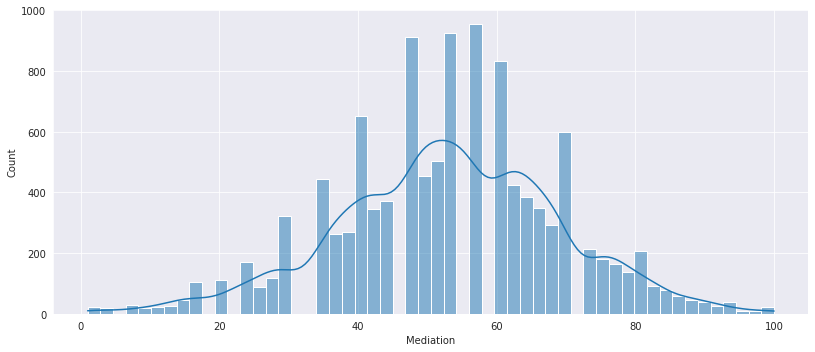

In [ ]:
sns.set_style('darkgrid')
sns.displot(data=data,x='Mediation',kde=True,aspect=16/7)

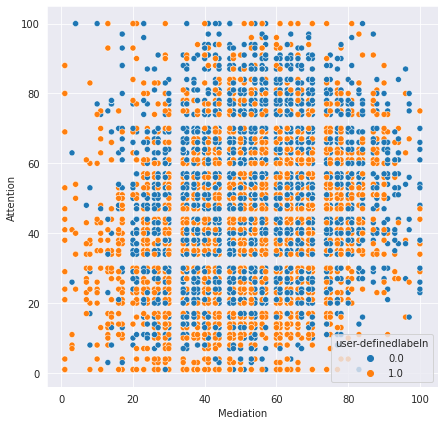

In [ ]:
fig,ax=plt.subplots(figsize=(7,7))
sns.scatterplot(data=data,x='Mediation',y='Attention',hue='user-definedlabeln')

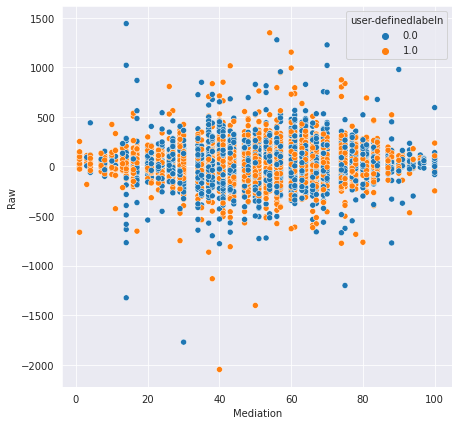

In [ ]:
fig,ax=plt.subplots(figsize=(7,7))
sns.scatterplot(data=data,x='Mediation',y='Raw',hue='user-definedlabeln')

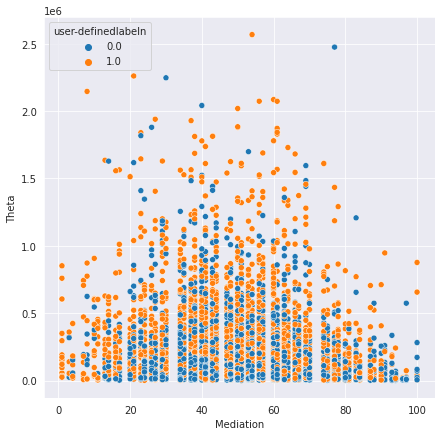

In [ ]:
fig,ax=plt.subplots(figsize=(7,7))
sns.scatterplot(data=data,x='Mediation',y='Theta',hue='user-definedlabeln')

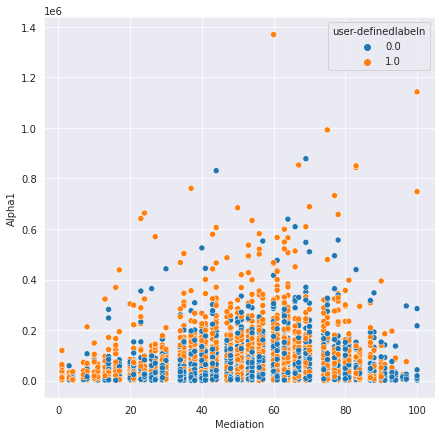

In [ ]:
fig,ax=plt.subplots(figsize=(7,7))
sns.scatterplot(data=data,x='Mediation',y='Alpha1',hue='user-definedlabeln')

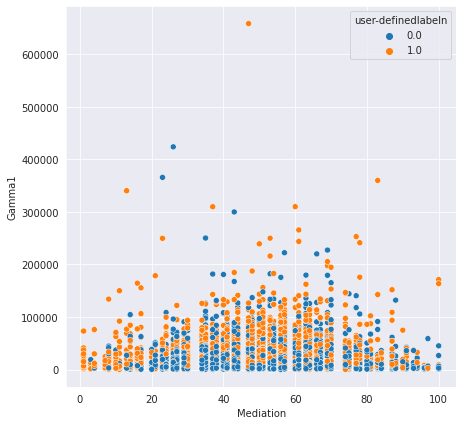

In [ ]:
fig,ax=plt.subplots(figsize=(7,7))
sns.scatterplot(data=data,x='Mediation',y='Gamma1',hue='user-definedlabeln')

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
y=[]
y=(data['user-definedlabeln'])
mi_score=mutual_info_classif(data.drop('user-definedlabeln',axis=1),data['user-definedlabeln'])
mi_score=pd.Series(mi_score,index=data.drop('user-definedlabeln',axis=1).columns)
mi_score=(mi_score*100).sort_values(ascending=False)
mi_score

VideoID            7.500467
Delta              3.019984
Alpha2             2.556643
Alpha1             2.231841
Theta              2.217442
Gamma1             2.177138
Beta1              2.017812
Attention          1.756838
Gamma2             1.743381
Raw                1.671141
SubjectID          1.360400
Beta2              1.074089
predefinedlabel    0.667222
ethnicity          0.445602
gender             0.129535
Mediation          0.050920
age                0.000000
dtype: float64

In [ ]:
mi_score.head(14).index

Index(['VideoID', 'Delta', 'Alpha2', 'Alpha1', 'Theta', 'Gamma1', 'Beta1',
       'Attention', 'Gamma2', 'Raw', 'SubjectID', 'Beta2', 'predefinedlabel',
       'ethnicity'],
      dtype='object')

In [ ]:
top_fea=['VideoID', 'Attention', 'Alpha2', 'Delta', 'Gamma1', 'Theta', 'Beta1',
       'Alpha1', 'Mediation', 'Gamma2', 'SubjectID', 'Beta2', 'Raw', 'age']

In [ ]:
from sklearn.preprocessing import StandardScaler
df_sc=StandardScaler().fit_transform(data[top_fea])

In [ ]:

data.shape

(11388, 18)

In [ ]:
x_subject=[]
jj=0
Y=[]
xx=[]
for ii in range(10):
  for kk in range(10):
    for jj in range(11388):
      if data['SubjectID'].values[jj]==ii:
        if data['VideoID'].values[jj]==kk:
          xx.append(df_sc[jj,:])
    Y.append(xx)
    xx=[]
  x_subject.append(Y)
  Y=[]


In [ ]:
len(x_subject[0][5])

121

In [ ]:
x_subject[0][5]

In [ ]:
x_augmented=[]
y_augmented=[]
t=0
for i in range(10):
  for j in range(10):
    for k in range(len(x_subject[i][j])-50):
      x_augmented.append(x_subject[i][j][k:k+50])
      y_augmented.append(y[t+500*(i)+50*(j)])
      t=t+1

KeyError: ignored

In [ ]:
len(x_augmented)

7811

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import callbacks,layers

In [ ]:
from sklearn.model_selection import train_test_split
#Xtr,xte,Ytr,yte=train_test_split(df_sc,y,random_state=108,test_size=0.27)
xtr= np.array(x_augmented[1:6467][:],dtype=np.float)
xval=np.array(x_augmented[6468:7811][:],dtype=np.float)
ytr=np.array(y_augmented[1:6467],dtype=np.float)
yval=np.array(y_augmented[6468:7811],dtype=np.float)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/u

In [ ]:
from sklearn.utils import shuffle
C=np.array(range(1,6466))
C1=shuffle(C)
Xtr=xtr[C1][:][:]
Yvtr=ytr[C1]


In [ ]:
C2=np.array(range(1,11767))
C3=shuffle(C2)
C4=np.array(range(11769,12811))
C5=shuffle(C4)
x_w_augement=df_sc[1:11768][:]
x_v_augement=df_sc[11769:12811][:]
y_w_augmented=y[1:11768]
y_v_augmented=y[11769:12811]
X_new=x_w_augement[C3][:]
y_new=y_w_augmented[C3]

In [ ]:
#Creating the callback feature to stop the training in-Between, in case of no improvement
call=callbacks.EarlyStopping(patience=200,min_delta=0.0001,restore_best_weights=True)
#Fitting the model
history=model1.fit(x_w_augement,y_w_augmented,validation_data=(x_v_augement,y_v_augmented),batch_size=32,epochs=200,callbacks=[call])

Epoch 1/200


KeyboardInterrupt: ignored

In [ ]:
#CNN_BiLSTM Model

import tensorflow as tf

from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import SimpleRNN
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import LSTM
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers  import  BatchNormalization

from keras.layers import Dropout
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import Bidirectional

model4 = Sequential()
model4.add(Input(shape=(None,50,14,1)))
model4.add(Conv2D(16,(3,3),activation = 'tanh'))
model4.add(Dropout(0.05))
model4.add(Conv2D(32,(5,5),activation = 'tanh'))
model4.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model4.add(TimeDistributed((Flatten())))
#model4.add(tf.keras.layers.Reshape((None, 2816,1), input_shape=(None, 2816)))
model4.add(Bidirectional(LSTM(10, return_sequences=True)))
model4.add(Dense(1, activation='sigmoid'))

#model4=Model(i, x)
model4.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
#model4.build((50,14,1))
model4.summary()
    #Training the LSTM


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, None, 48, 12, 16)  160       
                                                                 
 dropout_16 (Dropout)        (None, None, 48, 12, 16)  0         
                                                                 
 conv2d_21 (Conv2D)          (None, None, 44, 8, 32)   12832     
                                                                 
 time_distributed_2 (TimeDis  (None, None, 22, 4, 32)  0         
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, None, 2816)       0         
 tributed)                                                       
                                                                 
 bidirectional_1 (Bidirectio  (None, None, 20)        

In [ ]:
# Previous work Model

model1=keras.Sequential([
    layers.Dense(64,input_shape=(14,),activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.27),
    layers.Dense(124,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(248,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.32),   
    layers.Dense(512,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.27),   
    layers.Dense(664,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(512,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.32),
    layers.Dense(264,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.27),
    layers.Dense(124,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1,activation='sigmoid')
])
#Compiling the model with Adamax Optimizer
model1.compile(optimizer='adamax',loss='binary_crossentropy',metrics='accuracy')
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                960       
                                                                 
 batch_normalization_13 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dropout_17 (Dropout)        (None, 64)                0         
                                                                 
 dense_19 (Dense)            (None, 124)               8060      
                                                                 
 batch_normalization_14 (Bat  (None, 124)              496       
 chNormalization)                                                
                                                                 
 dropout_18 (Dropout)        (None, 124)              

In [ ]:
#Developed Network 

import tensorflow as tf

from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import SimpleRNN
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import LSTM
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers  import  BatchNormalization

model = Sequential()
model.add(Conv2D(filters=25,kernel_size=[5,5],padding='same',activation='relu',input_shape= (50,14,1)))
#model.add(BatchNormalization())
model.add(Conv2D(filters=25,kernel_size=[5,5],padding='same',activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 1),strides=None,padding='valid',data_format=None))
model.add(Dropout(0.2))
#model.add(Flatten())
#model.add(Dense(128,activation='relu'))
model.add(Conv2D(filters=50,kernel_size=[3,3],padding='same',activation='relu'))
#model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2, 1)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=100,kernel_size=[3,3],padding='same',activation='relu'))
#model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 1)))
model.add(Dropout(0.5))
model.add(Conv2D(filters=200,kernel_size=[3,3],padding='same',activation='relu'))
model.add(BatchNormalization())
#model.add(Dense(32,activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 1)))
model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

#model.add(LSTM(25, return_sequences= True, activation = 'relu'))
#model.add(Dense(128,activation='relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.27))
#model.add(Dense(124,activation='relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.3))
#model.add(Dense(1,activation='sigmoid'))
#model.add(Dense(number_of_signal_channel_in_use*number_of_timepoint_for_Y))
model.compile(loss='binary_crossentropy', optimizer= 'adamax', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 14, 25)        650       
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 14, 25)        15650     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 14, 25)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 25, 14, 25)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 14, 50)        11300     
                                                                 
 average_pooling2d (AverageP  (None, 12, 14, 50)       0         
 ooling2D)                                              

In [ ]:
#VGG_16

from tensorflow.keras.layers import MaxPooling2D

model2 = Sequential()
model2.add(Conv2D(input_shape=(50,14,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model2.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model2.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model2.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model2.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model2.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model2.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model2.add(Flatten())
model2.add(Dense(units=4096,activation="relu"))
model2.add(Dense(units=4096,activation="relu"))
model2.add(Dense(units=1, activation="softmax"))
model2.compile(loss='binary_crossentropy', optimizer= 'adamax', metrics=['accuracy'])
model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 50, 14, 64)        640       
                                                                 
 conv2d_28 (Conv2D)          (None, 50, 14, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 25, 7, 64)        0         
 2D)                                                             
                                                                 
 conv2d_29 (Conv2D)          (None, 25, 7, 128)        73856     
                                                                 
 conv2d_30 (Conv2D)          (None, 25, 7, 128)        147584    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 12, 3, 128)       0         
 g2D)                                                 

In [ ]:
print(ytr)

[0. 0. 0. ... 0. 0. 0.]


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 50, 14, 480)       512704    
                                                                 
 flatten_1 (Flatten)         (None, 336000)            0         
                                                                 
 dense_4 (Dense)             (None, 64)                21504064  
                                                                 
 dense_5 (Dense)             (None, 16)                1040      
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 22,017,825
Trainable params: 22,017,825
Non-trainable params: 0
_________________________________________________________________


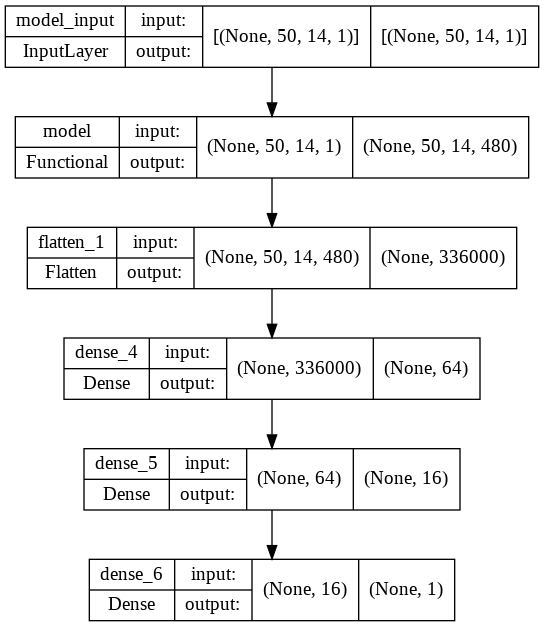

In [ ]:
#INCEPTION

from keras.engine import sequential
# example of creating a CNN with an inception module
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers.merge import concatenate
from keras.utils.vis_utils import plot_model
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import SimpleRNN
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import LSTM
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers  import  BatchNormalization


# function for creating a naive inception block
def inception_module(layer_in, f1, f2_in, f2_out, f3_in, f3_out, f4_out):
	# 1x1 conv
	conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)
	# 3x3 conv
	conv3 = Conv2D(f2_in, (1,1), padding='same', activation='relu')(layer_in)
	conv3 = Conv2D(f2_out, (3,3), padding='same', activation='relu')(conv3)
	# 5x5 conv
	conv5 = Conv2D(f3_in, (1,1), padding='same', activation='relu')(layer_in)
	conv5 = Conv2D(f3_out, (5,5), padding='same', activation='relu')(conv5)
	# 3x3 max pooling
	pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)
	pool = Conv2D(f4_out, (1,1), padding='same', activation='relu')(pool)
	# concatenate filters, assumes filters/channels last
	layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)
	return layer_out
 

# define model input
visible = Input(shape=(50, 14, 1))
# add inception module
layer = inception_module(visible, 64, 96, 128, 16, 32, 32)
layer = inception_module(layer, 128, 128, 192, 32, 96, 64)
# create model
model = Model(inputs=visible, outputs=layer)
# summarize model
model5=Sequential()
model5.add(model)
model5.add(Flatten())
model5.add(Dense(units=64,activation="relu"))
model5.add(Dense(units=16,activation="relu"))
model5.add(Dense(units=1, activation="softmax"))
model5.compile(loss='binary_crossentropy', optimizer= 'adamax', metrics=['accuracy'])
model5.summary()
# plot model architecture
plot_model(model5, show_shapes=True, to_file='naive_inception_module.png')

In [ ]:
from numpy.ma.core import reshape
#Creating the callback feature to stop the training in-Between, in case of no improvement
call=callbacks.EarlyStopping(patience=50,min_delta=0.0001,restore_best_weights=True)
k=len(Xtr)*len(Xtr[0])*len(Xtr[0][0])//700
Xtr1=reshape(Xtr,new_shape=(k,1,50,14,1))
k1=len(xval)*len(xval[0])*len(xval[0][0])//700
xval1=reshape(xval,new_shape=(k1,1,50,14,1))
Yvtr1=reshape(Yvtr,new_shape=(len(Yvtr),1,1))
yval1=reshape(yval,new_shape=(len(yval),1,1))
#Fitting the model
history=model5.fit(Xtr,Yvtr,validation_data=(xval,yval),epochs = 50, 
                  verbose = 2,
                  batch_size = 32,
                 shuffle = True)

Epoch 1/50
203/203 - 355s - loss: 0.6629 - accuracy: 0.5138 - val_loss: 0.5333 - val_accuracy: 0.5175 - 355s/epoch - 2s/step
Epoch 2/50
203/203 - 346s - loss: 0.2725 - accuracy: 0.5138 - val_loss: 0.3957 - val_accuracy: 0.5175 - 346s/epoch - 2s/step
Epoch 3/50
203/203 - 347s - loss: 0.1504 - accuracy: 0.5138 - val_loss: 0.4977 - val_accuracy: 0.5175 - 347s/epoch - 2s/step
Epoch 4/50
203/203 - 345s - loss: 0.0761 - accuracy: 0.5138 - val_loss: 0.4885 - val_accuracy: 0.5175 - 345s/epoch - 2s/step
Epoch 5/50
203/203 - 345s - loss: 0.0335 - accuracy: 0.5138 - val_loss: 1.2524 - val_accuracy: 0.5175 - 345s/epoch - 2s/step
Epoch 6/50
203/203 - 345s - loss: 0.0214 - accuracy: 0.5138 - val_loss: 0.8858 - val_accuracy: 0.5175 - 345s/epoch - 2s/step
Epoch 7/50
203/203 - 345s - loss: 0.0082 - accuracy: 0.5138 - val_loss: 1.3188 - val_accuracy: 0.5175 - 345s/epoch - 2s/step
Epoch 8/50
203/203 - 345s - loss: 0.0028 - accuracy: 0.5138 - val_loss: 1.0508 - val_accuracy: 0.5175 - 345s/epoch - 2s/step


In [ ]:
training=pd.DataFrame(history.history)

In [ ]:
yout=model.predict(xval)
for i in range(len(yout)):
  print(yout[i])

KeyboardInterrupt: ignored

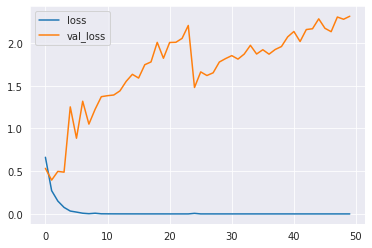

In [ ]:
training.loc[:,['loss','val_loss']].plot()

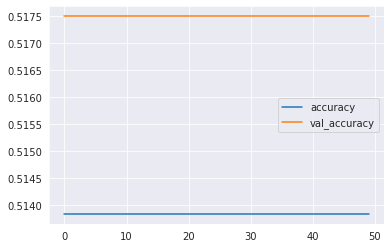

In [ ]:
training.loc[:,['accuracy','val_accuracy']].plot()